In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visa_df=pd.read_csv(r"C:\Users\syedh\Downloads\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

# Boxplot

In [6]:
# Box plot is used to identidy the outliers
# Outliers is an observation having huge positive value or hage negative value
# Q1 =25p, Q2=5p and Q3=75p
# IQR= inter quartile range=Q3-Q1
#Q3+1.5*IQR and Q1.5*IQR

             Q1-1.5IQR Q1 median Q3 Q3+1.5IQR
                 
                         |-----:-----|
             o  |--------|     :     |--------| o o
                         |-----:-----|
                   flier <-----------> fliers
                             IQR

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [ ]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.xlabel('Wages')
plt.show()

In [ ]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Boxplot')
plt.xlabel('Wages')
plt.show()

In [ ]:
wawage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Boxplot')
plt.xlabel('Wages')
plt.show()

# **plot the histogram plot and box plot side by side

In [ ]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()


In [ ]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

# Find the outliers

In [ ]:
**Finging the outliers**

-we already know that outliers available less Q1-1.5*IQR

-Step-1:
-Calculate Q1 =25p
-Calculate Q2=50p
-Calculate Q3=75p

-step-2:
-Calculate IQR=Q3-Q1

-step-3:

   -Calculate LB=  Q1-1.5*IQR
   -Caluclate UB=Q3+1.5*IQR
-step-4
  -Con1=wage data <LB
  -Con2=wage data >UD
  -Con3=con1 or and con2(use bitwise operator)

-Step-5: Data[con3]

In [24]:
wage_data=visa_df['prevailing_wage']
# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
#step-2
IQR=q3-q1
#Step-3:
lb= q1-1.5*IQR
ub=q3+1.5*IQR
#step-4:
con1=wage_data<lb # T F
con2=wage_data>ub # T F
con3=con1|con2
# Bitwise operators used to compare
# Bits data===0 and 1 == True false
#Step-3:
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [25]:
outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [ ]:
wage_data=visa_df['prevailing_wage']
# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
# step-2
IQR=q3-q1
# step-3
lb=q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4:
con1=wage_data>lb # T F
con2= wage_data<ub # T F
con3=con1&con2
#Bitwise operators used to compare
# Bits data ===0 and 1 == True false
# Step=3:
#np.Logical_and(Con1, con2)
non_outliers_df=visa_df[con3]
non_outliers_df

In [ ]:
- we have two dataframe

-visa_df: Total data 25480

-non_outliers_df=After removing outliers 25053

-first plot nonoutliers data prevailing wage histogram and boxplot

In [22]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
plt.show()

NameError: name 'non_outliers_df' is not defined

In [21]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
################# Non outliers######################################
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
###################### Entire data ################################
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

NameError: name 'non_outliers_df' is not defined

In [20]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')

NameError: name 'non_outliers_df' is not defined

In [ ]:
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')

NameError: name 'wage_data' is not defined

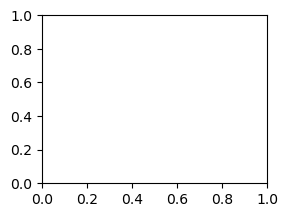

In [8]:
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

In [ ]:
## Fill the outliers of wage data with wage median
# 427 outliers
# 427 should replace with median value
# again draw the plots

# 12 Aug

In [9]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
#################### Non outliers######################
plt.figure(figsize=(14,88))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show

NameError: name 'non_outliers_df' is not defined

**How to deal outliers**

- 1. We can drop the outliers
     - Droping outliers is an easy task,but not recomended
     - If you drop the outliers we are droping the rows
     -which means we are dropping the column values also
     -May be some important information we might loose from other column values
    - But in industry if outliers percentage less than 2% of the total data, we can drop
    -The number of outliers is pwage is 427
    -The number of total observations are 25480
    -The percentage is 1.67 which is less than 2%
-2. Fill with Median value
    -we already know that outliers does not affect by median
    -so it is the best practice to fill the outliers with median
-3.Capping or Florring
  -Instead of fill with median
  - we can fill with certain values
  -the outliers which sre less than LB fill with LB value
  - the outlers which are greater than UB fill with UB value
-**Isolation Forest***
 -Is ML model used to find the Outliers and anamolies

# Fill with Median Value


In [10]:
**np.where**

-In numpy we have method called where

-It takes three arguments

  -1.Condition
  -2.Value if Condition is True
  -3. Value if Condition is False
-It is applicable for only Binary if and else

SyntaxError: invalid decimal literal (638908386.py, line 7)

In [11]:
dict={'Sub':['DS'

SyntaxError: incomplete input (2707133148.py, line 1)

In [12]:
for value in wage_data:
    print(value)

NameError: name 'wage_data' is not defined

In [13]:
#list=[]
#or value < LB or value > UB:
#median=wage_data.median()
#l

In [14]:
dict1={'Sub':['DS','DE','CS'],
    'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df
           

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [15]:
con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [16]:
wage_data=visa_df['prevailing_wage']
con1=wage_data<lb
con2=wage_data>ub
con=con1|con2
wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

NameError: name 'lb' is not defined

In [18]:
visa_df['prevailing_wage_update']=l

ValueError: Length of values (3) does not match length of index (25480)

KeyError: 'prevailing_wage_update'

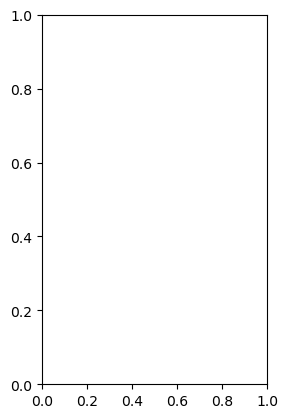

In [19]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])